Sample ID: HCR 3.11 S3  
Section: 200um coronal section from ALM  
Mouse: ANM471122 C57BI/6NCrl, sex M, DOB 10/21/2019  
Genes labelled: Vip (514 channel), Tac2 (546 channel), Npy2r (594 channel), Car4 (647 channel)  
Microscope: Zeiss 880 (regular confocal mode)  
Objective: 40X oil immersion 

# Setup

## Imports

In [347]:
%matplotlib inline    

# Create a Qt event loop for napari
from IPython import get_ipython
ipython = get_ipython()
ipython.magic("gui qt5")             

import napari
from PIL import Image

import numpy as np
import cv2

import matplotlib.pyplot as plt

import time

from os.path import sep
import pickle as pkl
import importlib

import get_metadata

from utils import diff_gauss
from utils import find_threshold

from segmentation import get_masks
from segmentation import get_background

from plotting import napari_rendering
from plotting import scatter_plots
from plotting import view_all_cells

from lipofuscin import annotated_lipo_rois
from lipofuscin import filter_lipo
from lipofuscin import detect

from expression import signal_and_bg

from classification import get_labels

from cell_depths import get_depths

# Enable autoreload of local modules
%load_ext autoreload
%autoreload 2        # Autoreload all modules except those excluded using %aimport
%aimport napari, PIL.Image, numpy, cv2, matplotlib.pyplot, time, importlib 

# from mpl_toolkits import mplot3d
# import matplotlib.colors as colors
# import matplotlib.path as mpltpath


# import h5py

# from bisect import bisect_left

# from skimage.measure import profile_line
# from skimage.filters import gaussian


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Specify data path

In [2]:
data_path = 'G:\\Shared drives\\as_share\\HCR\\HCR 3.11\\S3'
metadata_file = 'metadata.pkl'

## Metadata

In [346]:
um_per_px = 0.13

raw_image_path = '{0}{1}S3_raw_tiff_images'.format(data_path, sep)
seg_image_path = '{0}{1}S5_blurred_tiff_images'.format(data_path, sep)
plots_path = '{0}{1}Plots'.format(data_path, sep)
filt_image_path = '{0}{1}Filtered_tiff_images'.format(data_path, sep)

plane_nos = range(1, 11)
base_filename = 'S3_z'
genes = ['Vip', 'Tac2', 'Car4', 'Npy2r']
channel_names = {'Vip': '_ChS1-T3_ORG',
                 'Tac2': '_ChS2-T1_ORG',
                 'Npy2r': '_ChS2-T3_ORG',
                 'Car4': '_ChS2-T2_ORG'}
n_planes = len(plane_nos)
print('Number of planes: {0}'.format(n_planes))

# Create 4D array to store images
img = Image.open('{0}{1}{2}{3}{4}.tif'.format(raw_image_path, sep, base_filename, str(plane_nos[0]).zfill(2),
                                             channel_names[genes[0]]))

h = img.height
w = img.width

metadata = get_metadata.get_metadata(data_path, metadata_file, um_per_px, raw_image_path, seg_image_path, plots_path,
                                    filt_image_path, plane_nos, base_filename, genes, channel_names, n_planes, h, w)



Number of planes: 10


# Napari rendering

In [8]:
# Create viewer
viewer = napari_rendering.create_viewer()

##### Images

In [22]:
# Raw images
napari_rendering.images(data_path, metadata_file, viewer, planes = [0, 1])

Loading Vip images: 0.0 seconds
     Plane 1, 0.0 seconds
     Plane 2, 1.0 seconds
Loading Tac2 images: 3.0 seconds
     Plane 1, 3.0 seconds
     Plane 2, 4.0 seconds
Loading Car4 images: 6.0 seconds
     Plane 1, 6.0 seconds
     Plane 2, 7.0 seconds
Loading Npy2r images: 9.0 seconds
     Plane 1, 9.0 seconds
     Plane 2, 10.0 seconds


In [86]:
# Filtered images
napari_rendering.filt_images(data_path, metadata_file, viewer, planes = [0, 1], image_type = 'filt')

Loading Vip images: 0.0 seconds
     Plane 1, 0.0 seconds
     Plane 2, 1.0 seconds
Loading Tac2 images: 3.0 seconds
     Plane 1, 3.0 seconds
     Plane 2, 4.0 seconds
Loading Car4 images: 7.0 seconds
     Plane 1, 7.0 seconds
     Plane 2, 8.0 seconds
Loading Npy2r images: 10.0 seconds
     Plane 1, 10.0 seconds
     Plane 2, 11.0 seconds


##### Cell masks

In [58]:
napari_rendering.cell_masks(data_path, metadata_file, viewer, planes = [0, 1])

Cell 10
Cell 10
Cell 30
Cell 10
Cell 20
Cell 30


##### Annotated lipofuscin rois

In [62]:
napari_rendering.lipo_rois(data_path, metadata_file, viewer, planes = [0, 1])

No lipofuscin rois in the specified planes


##### Masks with lipofuscin exluded

In [181]:
napari_rendering.no_lipo_masks(data_path, metadata_file, viewer, planes = [0, 1])

# Segmentation

## Get cell pixels

In [314]:
cell_data, n_cells = get_masks.get_masks(data_path, metadata_file)
cell_pixels = get_masks.get_cell_pixels(data_path, metadata_file)
all_cell_pixels = get_masks.get_all_cell_pixels(data_path, metadata_file)

135 cell masks found
Finding pixels in cells
Cell 0: 26.0 seconds
Cell 2: 36.0 seconds
Cell 4: 47.0 seconds
Cell 6: 63.0 seconds
Cell 8: 78.0 seconds
Cell 10: 99.0 seconds
Cell 12: 110.0 seconds
Cell 14: 125.0 seconds
Cell 16: 136.0 seconds
Cell 18: 147.0 seconds
Cell 20: 167.0 seconds
Cell 22: 188.0 seconds
Cell 24: 209.0 seconds
Cell 26: 225.0 seconds
Cell 28: 246.0 seconds
Cell 30: 262.0 seconds
Cell 32: 272.0 seconds
Cell 34: 283.0 seconds
Cell 36: 298.0 seconds
Cell 38: 309.0 seconds
Cell 40: 330.0 seconds
Cell 42: 340.0 seconds
Cell 44: 361.0 seconds
Cell 46: 382.0 seconds
Cell 48: 403.0 seconds
Cell 50: 424.0 seconds
Cell 52: 439.0 seconds
Cell 54: 461.0 seconds
Cell 56: 481.0 seconds
Cell 58: 492.0 seconds
Cell 60: 513.0 seconds
Cell 62: 534.0 seconds
Cell 64: 554.0 seconds
Cell 66: 565.0 seconds
Cell 68: 575.0 seconds
Cell 70: 603.0 seconds
Cell 72: 619.0 seconds
Cell 74: 645.0 seconds
Cell 76: 655.0 seconds
Cell 78: 666.0 seconds
Cell 80: 686.0 seconds
Cell 82: 707.0 seconds


## Get background pixels

In [261]:
bg_pixels, centers = get_background.get_bg_pixels(data_path, metadata_file)
#all_bg_pixels = get_background.get_all_bg_pixels(data_path, metadata_file)

Background pixels found in G:\Shared drives\as_share\HCR\HCR 3.11\S3\bg_pixels.pkl
Finding pixels in local background of cells


## Segment cells

# Lipofuscin exclusion

## Annotated lipofuscin rois

In [76]:
# Load existing rois
l_rois = annotated_lipo_rois.get_rois(data_path, metadata_file)
all_lipo_pixels, lipo_pixels_roi = annotated_lipo_rois.get_cell_lipo_pixels(data_path, metadata_file)

6 rois
No saved data found, finding pixels in lipofuscin rois
Calculated grid coordinates, 26.0 seconds
ROI 0
ROI 1
ROI 2
ROI 3
ROI 4
ROI 5


##### Draw new rois

In [64]:
viewer.add_shapes(data = None, name = 'Lipofuscin rois', edge_color = 'white')

<Shapes layer 'Lipofuscin ROIs' at 0x1f589b08>

In [73]:
try:
    with open('{0}{1}{2}'.format(data_path, sep, metadata['lipo_rois_file']), 'rb') as f:
        l_rois = pkl.load(f) 
    l_rois = np.append(l_rois, viewer.layers['Lipofuscin rois'].data, axis = 0)
except:
    l_rois = viewer.layers['Lipofuscin rois'].data
    
with open('{0}{1}{2}'.format(data_path, sep, metadata['lipo_rois_file']), 'wb') as f:
    pkl.dump(l_rois, f) 
    
n_rois = len(l_rois)
print('{0} lipofuscin rois'.format(n_rois))

6 lipofuscin rois


## Detect lipofuscin rois in cells and background

In [315]:
# Filter images - 5.5 min
cell_filt_values, bg_filt_values, annotated_lipo_filt_values = filter_lipo.filter(data_path, metadata_file, 
                                                                                  thresh_scale = 1,
                                                                                  save_tiffs = True)



Filtering Vip images: 0.0 seconds
Plane 1, 0.0 seconds
Saving plane 0: 7.0 seconds
Plane 2, 7.0 seconds
Saving plane 1: 14.0 seconds
Plane 3, 14.0 seconds
Saving plane 2: 21.0 seconds
Plane 4, 22.0 seconds
Saving plane 3: 29.0 seconds
Plane 5, 29.0 seconds
Saving plane 4: 37.0 seconds
Plane 6, 37.0 seconds
Saving plane 5: 44.0 seconds
Plane 7, 45.0 seconds
Saving plane 6: 52.0 seconds
Plane 8, 53.0 seconds
Saving plane 7: 60.0 seconds
Plane 9, 60.0 seconds
Saving plane 8: 68.0 seconds
Plane 10, 68.0 seconds
Saving plane 9: 75.0 seconds
Filtering Tac2 images: 76.0 seconds
Plane 1, 76.0 seconds
Saving plane 0: 83.0 seconds
Plane 2, 83.0 seconds
Saving plane 1: 90.0 seconds
Plane 3, 91.0 seconds
Saving plane 2: 98.0 seconds
Plane 4, 98.0 seconds
Saving plane 3: 106.0 seconds
Plane 5, 106.0 seconds
Saving plane 4: 113.0 seconds
Plane 6, 114.0 seconds
Saving plane 5: 121.0 seconds
Plane 7, 122.0 seconds
Saving plane 6: 129.0 seconds
Plane 8, 129.0 seconds
Saving plane 7: 136.0 seconds
Plane

In [316]:
# Get mahalanobis distance from lipofuscin pixels
m_dist_cells, m_dist_bg, m_dist_lipo = detect.get_m_dist(data_path, metadata_file)

(array([15., 31., 31., 25., 25., 39., 37., 32., 40., 19., 18., 19., 15.,
        28., 11.,  2.,  4.,  5.,  2.,  2.]),
 array([0.80112232, 0.94928444, 1.09744656, 1.24560868, 1.3937708 ,
        1.54193292, 1.69009504, 1.83825716, 1.98641928, 2.1345814 ,
        2.28274352, 2.43090564, 2.57906776, 2.72722988, 2.875392  ,
        3.02355412, 3.17171624, 3.31987836, 3.46804048, 3.6162026 ,
        3.76436472]),
 <a list of 20 Patch objects>)

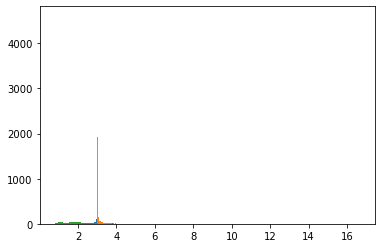

In [317]:
cell = 95
plane = cell_data[cell]['z_planes'][0]

plt.figure()
plt.hist(m_dist_cells[cell][plane], 100)
plt.hist(m_dist_bg[cell][plane], 500)
plt.hist(m_dist_lipo, 20)

In [318]:
cell_pixels_no_lipo, bg_pixels_no_lipo = detect.get_lipo(data_path, metadata_file, thresh_scale = 1.5)

# Measure expression

In [320]:
# Filter images and calculate signal (2.5 min)
signal_raw, signal_filt, bg_raw, bg_filt = signal_and_bg.get_signal_and_bg(data_path, metadata_file, save_tiffs = True)


Filtering Vip images: 0.0 seconds
Plane 1, 0.0 seconds
Saving plane 0: 4.0 seconds


C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\singha\AppData\Local\Continuum\anaconda3\envs\fish\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Plane 2, 5.0 seconds
Saving plane 1: 9.0 seconds
Plane 3, 9.0 seconds
Saving plane 2: 13.0 seconds
Plane 4, 13.0 seconds
Saving plane 3: 18.0 seconds
Plane 5, 18.0 seconds
Saving plane 4: 24.0 seconds
Plane 6, 24.0 seconds
Saving plane 5: 28.0 seconds
Plane 7, 29.0 seconds
Saving plane 6: 33.0 seconds
Cell 95 plane 6: all pixels excluded
Plane 8, 33.0 seconds
Saving plane 7: 37.0 seconds
Cell 95 plane 7: all pixels excluded
Cell 107 plane 7: all pixels excluded
Plane 9, 37.0 seconds
Saving plane 8: 41.0 seconds
Cell 107 plane 8: all pixels excluded
Plane 10, 42.0 seconds
Saving plane 9: 46.0 seconds
Filtering Tac2 images: 46.0 seconds
Plane 1, 46.0 seconds
Saving plane 0: 50.0 seconds
Plane 2, 51.0 seconds
Saving plane 1: 55.0 seconds
Plane 3, 55.0 seconds
Saving plane 2: 59.0 seconds
Plane 4, 60.0 seconds
Saving plane 3: 64.0 seconds
Plane 5, 64.0 seconds
Saving plane 4: 68.0 seconds
Plane 6, 69.0 seconds
Saving plane 5: 73.0 seconds
Plane 7, 73.0 seconds
Saving plane 6: 78.0 seconds


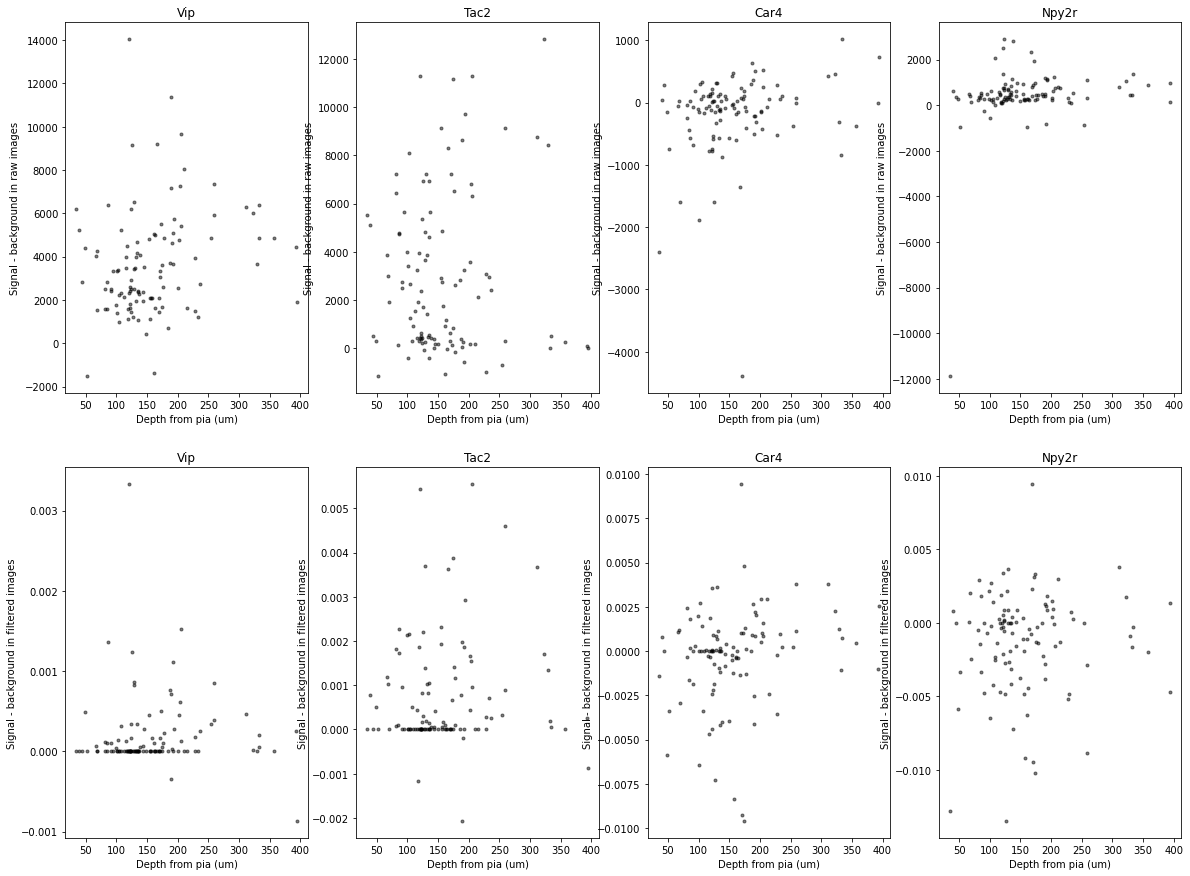

In [321]:
# Plot signal
scatter_plots.signal_vs_depth(data_path, metadata_file)

# Cell depths

In [204]:
# Draw surface of cortex
surface_layer = get_depths.draw_surface(data_path, metadata_file, viewer)

Text(0, 0.5, '# cells')

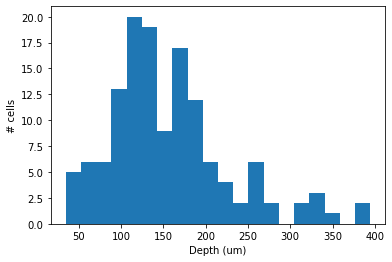

In [262]:
# Calculate depths
depths = get_depths.get_depths(data_path, metadata_file, surface_layer)
plt.figure()
plt.hist(depths, 20)
plt.xlabel('Depth (um)')
plt.ylabel('# cells')

# Classification

In [335]:
bs_raw, bs_filt = get_labels.get_bootstrap(data_path, metadata_file)

Loading Vip images: 0.0 seconds


IndexError: index 0 is out of bounds for axis 0 with size 0

# View images of cells

# Reload modules

In [345]:
# Ideally, modules should be auto-reloaded 

importlib.reload(get_metadata)

# Segmentation
importlib.reload(get_masks)
importlib.reload(get_background)

# Lipofuscin
importlib.reload(annotated_lipo_rois)
importlib.reload(filter_lipo)
importlib.reload(detect)

# Plotting
importlib.reload(napari_rendering)
importlib.reload(scatter_plots)
importlib.reload(view_all_cells)

# Expression
importlib.reload(signal_and_bg)

# Classification
importlib.reload(get_labels)

# Cell depths
importlib.reload(get_depths)

# Utils
importlib.reload(diff_gauss)
importlib.reload(find_threshold)

<module 'utils.find_threshold' from 'G:\\Shared drives\\as_share\\HCR\\FISH Image Analysis\\utils\\find_threshold.py'>

# Debugging